### Imports

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

In [45]:

os.chdir('C:/Users/Marcelo/machine_learning_trabalho')

#Carregar os dados
from src.data.load_data import load_data
soil_data = load_data()

# Exibi as primeiras linhas
print(soil_data.head())
# Exibi informações 
print(soil_data.info())


    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None


O dataset contém informações relacionadas a medidas de nutrientes do solo e o tipo de cultura agrícola associada. Ele apresenta 2.200 registros e 5 colunas:

N: Teor de Nitrogênio no solo (inteiro).
P: Teor de Fósforo no solo (inteiro).
K: Teor de Potássio no solo (inteiro).
ph: Nível de pH do solo (valor decimal).
crop: Nome da cultura agrícola associada (valor categórico)

In [46]:
# Exibir estatísticas descritivas para as variáveis numéricas
soil_data.describe()


,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


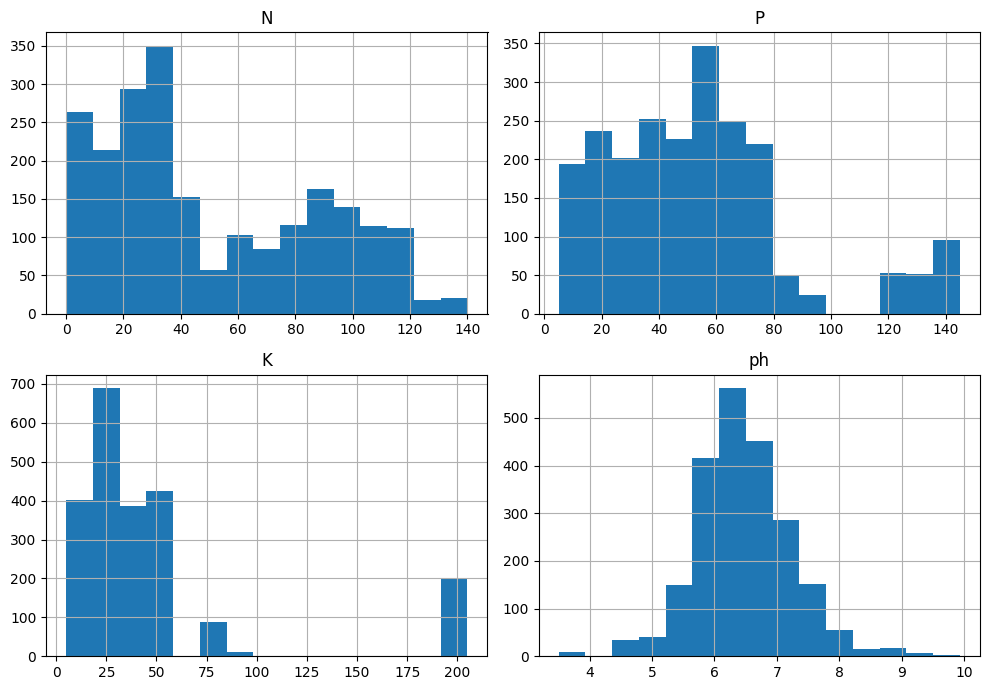

In [47]:
# Histograma para as variáveis
soil_data[['N', 'P', 'K', 'ph']].hist(bins=15, figsize=(10, 7))
plt.tight_layout()
plt.show()

As variáveis N, P, K, e ph mostram uma gama variada de valores.
Média de Nitrogênio (N): 50.55; Potássio (K): 48.15; Fósforo (P): 53.36; e pH: 6.47.
Os valores máximos de N (140), P (145) e K (205) estão bem distantes da média, sugerindo potenciais outliers.

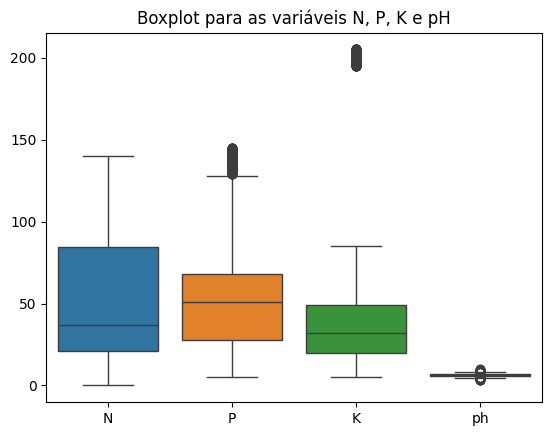

In [48]:
# Boxplot para detectar outliers nas variáveis
sns.boxplot(data=soil_data[['N', 'P', 'K', 'ph']])
plt.title('Boxplot para as variáveis N, P, K e pH')
plt.show()

Os boxplots mostram a distribuição de cada variável numérica (N, P, K e ph) e indicam valores que estão fora do intervalo normal, ou seja, potenciais outliers. Valores representados como pontos isolados fora das "caixas" dos boxplots sugerem a presença de outliers, especialmente nas variáveis N, P e K.

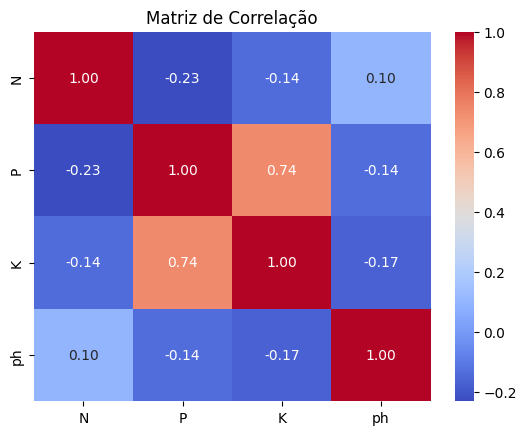

In [49]:
# Matriz de correlação
correlation_matrix = soil_data[['N', 'P', 'K', 'ph']].corr()

# Visualizando a matriz de correlação com um heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


A matriz de correlação indica uma correlação positiva alta entre P e K (0.736), sugerindo que solos com maior teor de fósforo tendem a ter mais potássio.
Outras correlações são relativamente baixas, indicando independência entre essas variáveis

In [50]:
# Detectando outliers usando o método IQR
Q1 = soil_data[['N', 'P', 'K', 'ph']].quantile(0.25)
Q3 = soil_data[['N', 'P', 'K', 'ph']].quantile(0.75)
IQR = Q3 - Q1

# Outliers são valores fora da faixa (Q1 - 1.5*IQR) a (Q3 + 1.5*IQR)
outliers = ((soil_data[['N', 'P', 'K', 'ph']] < (Q1 - 1.5 * IQR)) | (soil_data[['N', 'P', 'K', 'ph']] > (Q3 + 1.5 * IQR)))
outliers.sum()


N       0
P     138
K     200
ph     57
dtype: int64

N (Nitrogênio): Não há outliers (0).
P (Fósforo): Há 138 valores considerados outliers.
K (Potássio): Há 200 valores considerados outliers.
ph (pH): Há 57 valores considerados outliers.

In [51]:


# Carregar os dados
def load_data(filepath='data/raw/soil_measures.csv'):
    """Carrega os dados do arquivo CSV especificado."""
    return pd.read_csv(filepath)

# Identificar os outliers utilizando o IQR
def identify_outliers(df):
    """Identifica os outliers usando o método IQR."""
    
    # Selecionar apenas as colunas numéricas
    df_numeric = df.select_dtypes(include=[np.number])

    # Calcular os quantis apenas nas colunas numéricas
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identificar outliers
    outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
    
    return outliers

# Remover os outliers
def remove_outliers(df, outliers):
    """Remove os outliers da base de dados."""
    return df[~outliers.any(axis=1)]

# Substituir os outliers pela mediana
def replace_outliers_with_median(df, outliers):
    """Substitui os outliers pela mediana das respectivas colunas."""
    df_clean = df.copy()
    
    # Selecionar apenas as colunas numéricas para substituição de outliers
    df_numeric = df_clean.select_dtypes(include=[np.number])
    
    # Substitui os valores outliers por NaN nas colunas numéricas
    df_clean[df_numeric.columns] = df_clean[df_numeric.columns].where(~outliers, np.nan)
    
    # Preenche os NaNs com a mediana apenas nas colunas numéricas
    df_clean[df_numeric.columns] = df_clean[df_numeric.columns].fillna(df_numeric.median())
    
    return df_clean

# Função principal
def main():
    # Carregar os dados
    soil_data = load_data('data/raw/soil_measures.csv')

    # Identificar os outliers
    outliers = identify_outliers(soil_data)

    # Remover outliers
    soil_data_no_outliers = remove_outliers(soil_data, outliers)
    soil_data_no_outliers.to_csv('data/processed/soil_data_no_outliers.csv', index=False)

    # Substituir outliers por mediana
    soil_data_imputed = replace_outliers_with_median(soil_data, outliers)
    soil_data_imputed.to_csv('data/processed/soil_data_imputed.csv', index=False)

    print("Arquivos CSV gerados: 'soil_data_no_outliers.csv' e 'soil_data_imputed.csv'")

# Executar o código
if __name__ == "__main__":
    main()


Arquivos CSV gerados: 'soil_data_no_outliers.csv' e 'soil_data_imputed.csv'
